# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner

- 7 light


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [3]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm/', 'dsual.h5')


Path ualm: ./data/ozm/ /electricity
..Cargando el fichero   1 .csv
Leyendo fichero csv
          timestamp           W         VAR           VA        f      VLN  \
0      1.636564e+12     3.09877     1.60498     3.489747  50.0037  237.968   
1      1.636564e+12     2.82767     2.05442     3.495191  50.0035  238.019   
2      1.636564e+12   923.49300 -1164.99000  1486.620672  50.0033  238.984   
3      1.636564e+12  1743.33000 -2255.60000  2850.777236  50.0035  237.944   
4      1.636564e+12  1683.96000 -2277.24000  2832.232918  50.0031  237.739   
...             ...         ...         ...          ...      ...      ...   
48340  1.636574e+12     3.59328     2.01516     4.119773  50.0311  240.286   
48341  1.636574e+12     3.12230     1.87655     3.642828  50.0306  240.324   
48342  1.636574e+12     3.76413     1.05334     3.908734  50.0304  240.323   
48343  1.636574e+12     3.08361     2.70774     4.103719  50.0300  240.310   
48344  1.636574e+12     3.73579     2.21677     4.34398

                                         W         VAR           VA        f  \
2021-11-11 18:00:37.353000+01:00    2.7926     2.32843     3.635959  49.9752   
2021-11-11 18:00:37.553000+01:00  435.7640  -770.15200   884.886641  49.9752   
2021-11-11 18:00:37.753000+01:00  795.5510 -1366.51000  1581.218193  49.9750   
2021-11-11 18:00:37.953000+01:00  796.7320 -1366.96000  1582.201479  49.9754   
2021-11-11 18:00:38.153000+01:00  795.9120 -1366.10000  1581.045579  49.9752   
...                                    ...         ...          ...      ...   
2021-11-11 18:05:43.691000+01:00  807.9220 -1382.49000  1601.254682  50.0181   
2021-11-11 18:05:43.891000+01:00  808.3460 -1381.93000  1600.985253  50.0181   
2021-11-11 18:05:44.091000+01:00  807.1630 -1381.73000  1600.215580  50.0181   
2021-11-11 18:05:44.291000+01:00  806.3120 -1381.27000  1599.389213  50.0177   
2021-11-11 18:05:44.491000+01:00  807.7230 -1382.72000  1601.352879  50.0175   

                                      V

physical_quantity              power                        frequency  \
type                          active   reactive   apparent              
2021-11-11 18:19:27+01:00  15.662560 -20.805250  27.819618  50.029400   
2021-11-11 18:19:28+01:00  25.946739 -40.045460  47.723270  50.028580   
2021-11-11 18:19:29+01:00  23.429180 -33.620640  40.999477  50.027859   
2021-11-11 18:19:30+01:00  23.652840 -30.092480  38.594196  50.027660   
2021-11-11 18:19:31+01:00  22.773100 -32.482319  39.710587  50.027660   
...                              ...        ...        ...        ...   
2021-11-11 18:24:30+01:00  21.843401 -30.278059  37.338573  50.017658   
2021-11-11 18:24:31+01:00  21.477160 -30.160120  37.028530  50.018219   
2021-11-11 18:24:32+01:00  21.419680 -30.654181  37.398285  50.018860   
2021-11-11 18:24:33+01:00  21.074940 -31.136280  37.695408  50.019402   
2021-11-11 18:24:34+01:00  21.795200 -30.250000  37.291611  50.019848   

physical_quantity             voltage        pf   

Fichero  4 cargado ok
..Cargando el fichero   5 .csv
Leyendo fichero csv
         timestamp        W      VAR        VA        f      VLN        PF  \
0     1.636709e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
1     1.636709e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
2     1.636709e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
3     1.636709e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
4     1.636709e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
...            ...      ...      ...       ...      ...      ...       ...   
1537  1.636710e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
1538  1.636710e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
1539  1.636710e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
1540  1.636710e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.469975   
1541  1.636710e+12  3.09877  1.60498  3.489747  50.0037  237.968  0.4

Carga columnas
physical_quantity                     power                           \
type                                 active    reactive     apparent   
2021-11-11 17:41:34.028000+01:00    2.48986     3.23966     4.085927   
2021-11-11 17:41:34.228000+01:00  602.45800  -688.20600   914.649190   
2021-11-11 17:41:34.428000+01:00  809.83600 -1135.23000  1394.482520   
2021-11-11 17:41:34.628000+01:00  543.84700  -808.46500   974.364006   
2021-11-11 17:41:34.828000+01:00  487.29600  -733.40700   880.535757   
...                                     ...         ...          ...   
2021-11-11 17:46:40.320000+01:00  448.67200  -680.95900   815.482509   
2021-11-11 17:46:40.520000+01:00  450.24100  -680.26400   815.767165   
2021-11-11 17:46:40.720000+01:00  450.21000  -681.71600   816.961290   
2021-11-11 17:46:40.921000+01:00  449.72500  -682.75400   817.560762   
2021-11-11 17:46:41.120000+01:00  449.35500  -681.96100   816.694999   

physical_quantity                frequency  volt

[308 rows x 7 columns]
Fichero  7 cargado ok
Uniendo  Medadata
Done converting YAML metadata to HDF5!
Realizada con exito la conversion de ualM al formato  HDF5!


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [17]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [18]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [19]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [20]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [21]:
elec.mains().power_series_all_data().head()

2021-11-10 18:08:48+01:00     309.806488
2021-11-10 18:08:49+01:00    1503.478027
2021-11-10 18:08:50+01:00    1325.751953
2021-11-10 18:08:51+01:00    1321.244019
2021-11-10 18:08:52+01:00    1326.855957
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [22]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

### Etiquetas de dispositivos

Tenenos 7 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [23]:
 labels = pd.DataFrame({'Instances': list(range(1,8)),
                       'Meters': ['Medidor Principal', 'Boiler', 'Fan', 'Freezer', 'TV','Vacuum cleaner','Light']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [24]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [25]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [26]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]
#también print_dict(elec[7].device)



# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

In [27]:
light_meter = elec['light']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [30]:
light_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [31]:
light_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [15]:
light_meter.dominant_appliance()

Appliance(type='light', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
light_meter.total_energy() # kWh

active      0.000247
reactive    0.000265
apparent    0.000374
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(light_meter.load())

physical_quantity             voltage      power            frequency  \
type                                    apparent  reactive              
2021-11-11 18:10:50+01:00  238.339996   4.030965  3.181668  50.017700   
2021-11-11 18:10:51+01:00  238.441803  12.161527  7.694318  50.018059   
2021-11-11 18:10:52+01:00  238.421600   7.085585  3.377163  50.018520   
2021-11-11 18:10:53+01:00  238.382202   9.923549  5.236567  50.019279   
2021-11-11 18:10:54+01:00  238.430206  11.891074  0.510259  50.019718   
...                               ...        ...       ...        ...   
2021-11-11 18:15:53+01:00  236.987808   4.492986  3.146728  49.996178   
2021-11-11 18:15:54+01:00  236.915405   4.320917  3.103316  49.996498   
2021-11-11 18:15:55+01:00  237.076004   4.125006  2.987384  49.996899   
2021-11-11 18:15:56+01:00  237.032196   4.287810  3.115566  49.997341   
2021-11-11 18:15:57+01:00  236.964996   3.727745  2.406825  49.997799   

physical_quantity           current        pf     power  
type                                             active  
2021-11-11 18:10:50+01:00  0.068861  0.215095  2.416185  
2021-11-11 18:10:51+01:00  0.229841  0.057658  2.309019  
2021-11-11 18:10:52+01:00  0.220931 -0.024281 -2.403405  
2021-11-11 18:10:53+01:00  0.247085  0.034937  1.709180  
2021-11-11 18:10:54+01:00  0.247944  0.112019  6.977644  
...                             ...       ...       ...  
2021-11-11 18:15:53+01:00  0.071012  0.196007  3.169706  
2021-11-11 18:15:54+01:00  0.035418  0.368518  2.907208  
2021-11-11 18:15:55+01:00  0.041221  0.326454  2.825660  
2021-11-11 18:15:56+01:00  0.080274  0.161433  2.916932  
2021-11-11 18:15:57+01:00  0.047106  0.257199  2.841565  

[308 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (light_meter.power_series())

2021-11-11 18:10:50+01:00    2.416185
2021-11-11 18:10:51+01:00    2.309019
2021-11-11 18:10:52+01:00   -2.403405
2021-11-11 18:10:53+01:00    1.709180
2021-11-11 18:10:54+01:00    6.977644
                               ...   
2021-11-11 18:15:53+01:00    3.169706
2021-11-11 18:15:54+01:00    2.907208
2021-11-11 18:15:55+01:00    2.825660
2021-11-11 18:15:56+01:00    2.916932
2021-11-11 18:15:57+01:00    2.841565
Name: (power, active), Length: 308, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

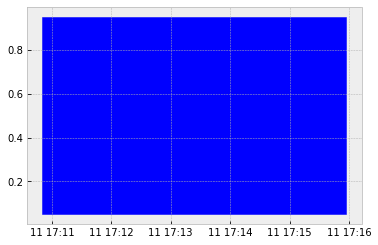

In [20]:
good_sections = light_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2021-11-11 18:10:50+01:00', end='2021-11-11 18:15:57+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
light_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas las luzes del conjunto de datos DSUALM::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='light')

MeterGroup(meters=
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['light', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['current', 'voltage', 'frequency', 'power', 'pf']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['current', 'voltage', 'frequency', 'power', 'pf']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['current', 'voltage', 'frequency', 'power', 'pf']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['current', 'voltage', 'frequency', 'power', 'pf']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['current', 'voltage', 'frequency', 'power', 'pf']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['current', 'voltage', 'frequency', 'power', 'pf']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['current', 'voltage', 'frequency', 'power', 'pf']

In [33]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (light)


['current', 'voltage', 'frequency', 'power', 'pf']

## Medidas disponibles relativas a la potencia


In [34]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [35]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [36]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [37]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [38]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [39]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [40]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7 

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por appliance

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [41]:
freezer = elec['freezer']
freezer.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

In [42]:
boiler = elec['boiler']
boiler.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

In [43]:
fan = elec['fan']
fan.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

In [44]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

In [45]:
light = elec['light']
light.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

In [46]:
television = elec['television']
television.available_columns()

[('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('frequency', None),
 ('current', None),
 ('pf', None),
 ('power', 'active')]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [47]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['current', 'voltage', 'frequency', 'power', 'pf']
Mediciones de Potencia disponibles - Dataset: ['reactive', 'active', 'apparent']

Medidas disponibles por cada medidor:
Medidor Principal: ['current', 'voltage', 'frequency', 'power', 'pf']
Boiler: ['current', 'voltage', 'frequency', 'power', 'pf']
Fan: ['current', 'voltage', 'frequency', 'power', 'pf']
Freezer: ['current', 'voltage', 'frequency', 'power', 'pf']
TV: ['current', 'voltage', 'frequency', 'power', 'pf']
Vacuum cleaner: ['current', 'voltage', 'frequency', 'power', 'pf']
Light: ['current', 'voltage', 'frequency', 'power', 'pf']

Medidas de potencia por cada medidor:
Medidor Principal: ['active', 'apparent', 'reactive']
Boiler: ['active', 'apparent', 'reactive']
Fan: ['active', 'apparent', 'reactive']
Freezer: ['active', 'apparent', 'reactive']
TV: ['active', 'apparent', 'reactive']
Vacuum cleaner: ['active', 'apparent', 'reactive']
Light: ['active', 'apparent', 'reactive']


Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

Veamos un esquema de la red formada por los difrentes medidores

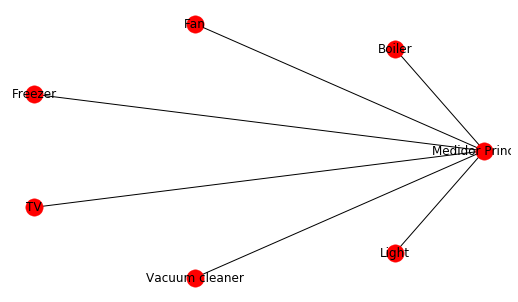

In [94]:
rcParams['figure.figsize'] = (7, 4)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/paso1/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [50]:
elec.get_timeframe()

TimeFrame(start='2021-11-10 18:08:48+01:00', end='2021-11-12 10:31:51+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 7(es decir todos menos el principal). 

In [51]:
Devices = elec.select(instance=[2,3,4,5,6,7])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:8])]
df

,Boiler,Fan,Freezer,TV,Vacuum cleaner,Light
2021-11-11 17:41:00+01:00,NaN,NaN,NaN,NaN,454.832520,NaN
2021-11-11 17:42:00+01:00,NaN,NaN,NaN,NaN,451.937531,NaN
2021-11-11 17:43:00+01:00,NaN,NaN,NaN,NaN,450.579712,NaN
2021-11-11 17:44:00+01:00,NaN,NaN,NaN,NaN,450.116272,NaN
2021-11-11 17:45:00+01:00,NaN,NaN,NaN,NaN,449.855804,NaN
2021-11-11 17:46:00+01:00,NaN,NaN,NaN,NaN,449.230927,NaN
2021-11-11 17:49:00+01:00,NaN,NaN,26.569918,NaN,NaN,NaN
2021-11-11 17:50:00+01:00,NaN,NaN,49.535671,NaN,NaN,NaN
2021-11-11 17:51:00+01:00,NaN,NaN,45.595875,NaN,NaN,NaN
2021-11-11 17:52:00+01:00,NaN,NaN,44.999367,NaN,NaN,NaN


Ahora veamos la potencia reactiva de los medidores del 2 al 7 (todos menos el principal).

In [52]:
Devices = elec.select(instance=[2,3,4,5,6,7])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Boiler,Fan,Freezer,TV,Vacuum cleaner,Light
2021-11-11 17:41:00+01:00,NaN,NaN,NaN,NaN,-683.964111,NaN
2021-11-11 17:42:00+01:00,NaN,NaN,NaN,NaN,-684.885193,NaN
2021-11-11 17:43:00+01:00,NaN,NaN,NaN,NaN,-681.919250,NaN
2021-11-11 17:44:00+01:00,NaN,NaN,NaN,NaN,-680.408142,NaN
2021-11-11 17:45:00+01:00,NaN,NaN,NaN,NaN,-680.429626,NaN
2021-11-11 17:46:00+01:00,NaN,NaN,NaN,NaN,-681.241943,NaN
2021-11-11 17:49:00+01:00,NaN,NaN,-20.160723,NaN,NaN,NaN
2021-11-11 17:50:00+01:00,NaN,NaN,-44.518772,NaN,NaN,NaN
2021-11-11 17:51:00+01:00,NaN,NaN,-38.648487,NaN,NaN,NaN
2021-11-11 17:52:00+01:00,NaN,NaN,-37.602959,NaN,NaN,NaN


Por ultimo, veamos la potencia aparente de los medidores del 2 al 7 (todos menos el principal).

In [53]:
Devices = elec.select(instance=[2,3,4,5,6,7])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Boiler,Fan,Freezer,TV,Vacuum cleaner,Light
2021-11-11 17:41:00+01:00,NaN,NaN,NaN,NaN,821.500000,NaN
2021-11-11 17:42:00+01:00,NaN,NaN,NaN,NaN,820.558289,NaN
2021-11-11 17:43:00+01:00,NaN,NaN,NaN,NaN,817.334900,NaN
2021-11-11 17:44:00+01:00,NaN,NaN,NaN,NaN,815.819153,NaN
2021-11-11 17:45:00+01:00,NaN,NaN,NaN,NaN,815.693359,NaN
2021-11-11 17:46:00+01:00,NaN,NaN,NaN,NaN,816.026672,NaN
2021-11-11 17:49:00+01:00,NaN,NaN,36.555145,NaN,NaN,NaN
2021-11-11 17:50:00+01:00,NaN,NaN,66.613098,NaN,NaN,NaN
2021-11-11 17:51:00+01:00,NaN,NaN,59.783478,NaN,NaN,NaN
2021-11-11 17:52:00+01:00,NaN,NaN,58.644718,NaN,NaN,NaN


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [54]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2021-11-11 17:41:00+01:00 to 2021-11-12 10:31:00+01:00
Data columns (total 6 columns):
(Boiler,)            6 non-null float32
(Fan,)               6 non-null float32
(Freezer,)           6 non-null float32
(TV,)                6 non-null float32
(Vacuum cleaner,)    6 non-null float32
(Light,)             6 non-null float32
dtypes: float32(6)
memory usage: 1.1 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 6(Vacuum Cleaner) con datos capturados de 16:41 a 16:46 tenemos la siguinte tabla que nos muestra todas las medidas

In [55]:
t0 = '2021-11-11 17:41:00+01:00' #tiempo inicial
t1 = '2021-11-11 17:46:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 
df_vac

physical_quantity             voltage       power              frequency  \
type                                     apparent    reactive              
2021-11-11 17:41:34+01:00  238.221191  833.623474 -672.413635  50.003002   
2021-11-11 17:41:35+01:00  238.145599  839.137512 -699.701599  50.005299   
2021-11-11 17:41:36+01:00  238.187408  829.777893 -691.781616  50.007660   
2021-11-11 17:41:37+01:00  238.347992  824.493958 -686.696411  50.009342   
2021-11-11 17:41:38+01:00  238.308197  819.976990 -681.287598  50.010681   
...                               ...         ...         ...        ...   
2021-11-11 17:45:56+01:00  237.440399  815.284363 -680.638184  50.009380   
2021-11-11 17:45:57+01:00  237.506195  815.524780 -680.156799  50.010120   
2021-11-11 17:45:58+01:00  237.623810  816.677246 -681.521606  50.010078   
2021-11-11 17:45:59+01:00  237.709396  816.460938 -681.274414  50.010899   
2021-11-11 17:46:00+01:00  237.600800  816.391907 -681.333984  50.012222   

physical_quantity           current        pf       power  
type                                               active  
2021-11-11 17:41:34+01:00  4.172580  0.475358  489.185364  
2021-11-11 17:41:35+01:00  3.558158  0.546656  463.216003  
2021-11-11 17:41:36+01:00  3.518126  0.546821  458.221405  
2021-11-11 17:41:37+01:00  3.493680  0.548003  456.328796  
2021-11-11 17:41:38+01:00  3.475362  0.550944  456.293793  
...                             ...       ...         ...  
2021-11-11 17:45:56+01:00  3.465766  0.545377  448.798615  
2021-11-11 17:45:57+01:00  3.465826  0.546632  449.962402  
2021-11-11 17:45:58+01:00  3.469752  0.545774  449.988403  
2021-11-11 17:45:59+01:00  3.467442  0.545919  449.970398  
2021-11-11 17:46:00+01:00  3.468218  0.545785  449.755188  

[267 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [56]:
df_vac.head()

physical_quantity             voltage       power              frequency  \
type                                     apparent    reactive              
2021-11-11 17:41:34+01:00  238.221191  833.623474 -672.413635  50.003002   
2021-11-11 17:41:35+01:00  238.145599  839.137512 -699.701599  50.005299   
2021-11-11 17:41:36+01:00  238.187408  829.777893 -691.781616  50.007660   
2021-11-11 17:41:37+01:00  238.347992  824.493958 -686.696411  50.009342   
2021-11-11 17:41:38+01:00  238.308197  819.976990 -681.287598  50.010681   

physical_quantity           current        pf       power  
type                                               active  
2021-11-11 17:41:34+01:00  4.172580  0.475358  489.185364  
2021-11-11 17:41:35+01:00  3.558158  0.546656  463.216003  
2021-11-11 17:41:36+01:00  3.518126  0.546821  458.221405  
2021-11-11 17:41:37+01:00  3.493680  0.548003  456.328796  
2021-11-11 17:41:38+01:00  3.475362  0.550944  456.293793

Vemos para el meter nº 4(Freezer) con datos capturados de 16:49 a 16:54 tenemos la siguinte tabla que nos muestra todas las medidas

In [57]:
t0 = '2021-11-11 17:49:00+01:00' #tiempo inicial
t1 = '2021-11-11 17:54:00+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity             voltage      power             frequency  \
type                                    apparent   reactive              
2021-11-11 17:49:47+01:00  238.014008   3.727449   2.183570  50.011902   
2021-11-11 17:49:48+01:00  238.138992   4.126142   3.014136  50.011162   
2021-11-11 17:49:49+01:00  238.162201   3.962116   2.796514  50.010120   
2021-11-11 17:49:50+01:00  238.033401   4.000784   2.705020  50.009682   
2021-11-11 17:49:51+01:00  238.013199   3.842267   2.557182  50.009441   
...                               ...        ...        ...        ...   
2021-11-11 17:53:56+01:00  237.701401  58.154972 -37.412720  50.004681   
2021-11-11 17:53:57+01:00  237.735397  57.981731 -37.076939  50.006001   
2021-11-11 17:53:58+01:00  237.788605  58.474163 -37.396362  50.006660   
2021-11-11 17:53:59+01:00  237.817001  58.295097 -37.371540  50.006180   
2021-11-11 17:54:00+01:00  237.766403  58.333366 -37.327480  50.005081   

physical_quantity           current        pf      power  
type                                              active  
2021-11-11 17:49:47+01:00  0.023590  0.538035   3.020910  
2021-11-11 17:49:48+01:00  0.029873  0.409389   2.813174  
2021-11-11 17:49:49+01:00  0.026298  0.448388   2.804554  
2021-11-11 17:49:50+01:00  0.026703  0.462149   2.941298  
2021-11-11 17:49:51+01:00  0.026253  0.462553   2.854542  
...                             ...       ...        ...  
2021-11-11 17:53:56+01:00  0.253504  0.738860  44.522099  
2021-11-11 17:53:57+01:00  0.252935  0.741335  44.577221  
2021-11-11 17:53:58+01:00  0.255172  0.740861  44.950882  
2021-11-11 17:53:59+01:00  0.255027  0.737720  44.739880  
2021-11-11 17:54:00+01:00  0.253868  0.742618  44.824841  

[254 rows x 7 columns]

Vemos para el meter nº 2(boiler) con datos capturados de 17:00 a 17:05 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [58]:
t0 = '2021-11-11 18:00:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:05:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             voltage        power               frequency  \
type                                      apparent     reactive              
2021-11-11 18:00:37+01:00  237.147507  1012.985596  -875.323364  49.975201   
2021-11-11 18:00:38+01:00  237.009995  1579.736450 -1364.891968  49.976341   
2021-11-11 18:00:39+01:00  236.849594  1577.947632 -1363.258057  49.979221   
2021-11-11 18:00:40+01:00  236.901001  1577.555176 -1363.026001  49.980701   
2021-11-11 18:00:41+01:00  236.955399  1577.452759 -1362.488037  49.980801   
...                               ...          ...          ...        ...   
2021-11-11 18:04:56+01:00  239.609802  1606.062866 -1387.631958  50.033779   
2021-11-11 18:04:57+01:00  239.698395  1606.493286 -1388.041992  50.032379   
2021-11-11 18:04:58+01:00  239.526398  1603.763550 -1385.817993  50.030521   
2021-11-11 18:04:59+01:00  239.482803  1604.229004 -1386.144043  50.028358   
2021-11-11 18:05:00+01:00  239.488403  1603.537231 -1385.411987  50.025581   

physical_quantity           current        pf       power  
type                                               active  
2021-11-11 18:00:37+01:00  4.593203  0.430817  507.709900  
2021-11-11 18:00:38+01:00  6.668746  0.503230  795.384583  
2021-11-11 18:00:39+01:00  6.665574  0.503336  794.635986  
2021-11-11 18:00:40+01:00  6.662668  0.503204  794.254395  
2021-11-11 18:00:41+01:00  6.661524  0.503631  794.970215  
...                             ...       ...         ...  
2021-11-11 18:04:56+01:00  6.706708  0.503206  808.649780  
2021-11-11 18:04:57+01:00  6.706092  0.503162  808.801575  
2021-11-11 18:04:58+01:00  6.699372  0.503027  807.196167  
2021-11-11 18:04:59+01:00  6.702500  0.503112  807.560974  
2021-11-11 18:05:00+01:00  6.699460  0.503255  807.443237  

[264 rows x 7 columns]

Veamos para el meter nº 7(Light) con datos capturados de 17:10 a 17:15 tenemos la siguinte tabla que nos muestra todas las medidas

In [59]:
t0 = '2021-11-11 18:10:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:15:00+01:00' #tiempo final


df_boiler = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             voltage      power            frequency  \
type                                    apparent  reactive              
2021-11-11 18:10:50+01:00  238.339996   4.030965  3.181668  50.017700   
2021-11-11 18:10:51+01:00  238.441803  12.161527  7.694318  50.018059   
2021-11-11 18:10:52+01:00  238.421600   7.085585  3.377163  50.018520   
2021-11-11 18:10:53+01:00  238.382202   9.923549  5.236567  50.019279   
2021-11-11 18:10:54+01:00  238.430206  11.891074  0.510259  50.019718   
...                               ...        ...       ...        ...   
2021-11-11 18:14:56+01:00  237.046799   4.349062  3.132474  50.030441   
2021-11-11 18:14:57+01:00  237.126801   4.557876  2.661736  50.029678   
2021-11-11 18:14:58+01:00  237.237793   4.153183  3.048090  50.028759   
2021-11-11 18:14:59+01:00  237.386002   4.178668  3.194018  50.027920   
2021-11-11 18:15:00+01:00  237.266602   4.149092  3.114150  50.027538   

physical_quantity           current        pf     power  
type                                             active  
2021-11-11 18:10:50+01:00  0.068861  0.215095  2.416185  
2021-11-11 18:10:51+01:00  0.229841  0.057658  2.309019  
2021-11-11 18:10:52+01:00  0.220931 -0.024281 -2.403405  
2021-11-11 18:10:53+01:00  0.247085  0.034937  1.709180  
2021-11-11 18:10:54+01:00  0.247944  0.112019  6.977644  
...                             ...       ...       ...  
2021-11-11 18:14:56+01:00  0.046272  0.318127  3.008558  
2021-11-11 18:14:57+01:00  0.063263  0.255456  3.616850  
2021-11-11 18:14:58+01:00  0.049481  0.294731  2.788236  
2021-11-11 18:14:59+01:00  0.055128  0.218347  2.602344  
2021-11-11 18:15:00+01:00  0.053159  0.252778  2.721540  

[251 rows x 7 columns]

Veamos para el meter nº 3(Fan) con datos capturados de 17:19 a 17:24 tenemos la siguinte tabla que nos muestra todas las medidas

In [60]:
t0 = '2021-11-11 18:19:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:27:00+01:00' #tiempo final


df_boiler = next(elec[3].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             voltage      power             frequency  \
type                                    apparent   reactive              
2021-11-11 18:19:27+01:00  237.092331  27.819618 -20.805250  50.029400   
2021-11-11 18:19:28+01:00  237.025604  47.723270 -40.045460  50.028580   
2021-11-11 18:19:29+01:00  236.947800  40.999477 -33.620640  50.027859   
2021-11-11 18:19:30+01:00  237.026794  38.594196 -30.092480  50.027660   
2021-11-11 18:19:31+01:00  237.058197  39.710587 -32.482319  50.027660   
...                               ...        ...        ...        ...   
2021-11-11 18:24:30+01:00  240.093994  37.338573 -30.278059  50.017658   
2021-11-11 18:24:31+01:00  240.128998  37.028530 -30.160120  50.018219   
2021-11-11 18:24:32+01:00  240.183197  37.398285 -30.654181  50.018860   
2021-11-11 18:24:33+01:00  240.229004  37.695408 -31.136280  50.019402   
2021-11-11 18:24:34+01:00  240.168747  37.291611 -30.250000  50.019848   

physical_quantity           current        pf      power  
type                                              active  
2021-11-11 18:19:27+01:00  0.138810  0.451383  15.662560  
2021-11-11 18:19:28+01:00  0.212134  0.517884  25.946739  
2021-11-11 18:19:29+01:00  0.204519  0.493365  23.429180  
2021-11-11 18:19:30+01:00  0.200054  0.498347  23.652840  
2021-11-11 18:19:31+01:00  0.199907  0.487475  22.773100  
...                             ...       ...        ...  
2021-11-11 18:24:30+01:00  0.158727  0.573225  21.843401  
2021-11-11 18:24:31+01:00  0.167290  0.535808  21.477160  
2021-11-11 18:24:32+01:00  0.165981  0.538408  21.419680  
2021-11-11 18:24:33+01:00  0.197112  0.491985  21.074940  
2021-11-11 18:24:34+01:00  0.167170  0.543750  21.795200  

[308 rows x 7 columns]

Veamos para el ultimoo meter nº 5(TV) con datos capturados el dia 12 de 9:26 a 9:31 tenemos la siguinte tabla que nos muestra todas las medidas

In [61]:
t0 = '2021-11-12 10:26:00+01:00' #tiempo inicial
t1 = '2021-11-12 10:31:00+01:00' #tiempo final


df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             voltage     power          frequency   current  \
type                                   apparent reactive                       
2021-11-12 10:26:44+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:26:45+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:26:46+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:26:47+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:26:48+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
...                               ...       ...      ...       ...       ...   
2021-11-12 10:30:56+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:30:57+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:30:58+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:30:59+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   
2021-11-12 10:31:00+01:00  237.968002  3.489747  1.60498   50.0037  0.027707   

physical_quantity                pf    power  
type                                  active  
2021-11-12 10:26:44+01:00  0.469975  3.09877  
2021-11-12 10:26:45+01:00  0.469975  3.09877  
2021-11-12 10:26:46+01:00  0.469975  3.09877  
2021-11-12 10:26:47+01:00  0.469975  3.09877  
2021-11-12 10:26:48+01:00  0.469975  3.09877  
...                             ...      ...  
2021-11-12 10:30:56+01:00  0.469975  3.09877  
2021-11-12 10:30:57+01:00  0.469975  3.09877  
2021-11-12 10:30:58+01:00  0.469975  3.09877  
2021-11-12 10:30:59+01:00  0.469975  3.09877  
2021-11-12 10:31:00+01:00  0.469975  3.09877  

[257 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [62]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.0

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar television.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [63]:
series = next(television.power_series())
series.head()

2021-11-12 10:26:44+01:00    3.09877
2021-11-12 10:26:45+01:00    3.09877
2021-11-12 10:26:46+01:00    3.09877
2021-11-12 10:26:47+01:00    3.09877
2021-11-12 10:26:48+01:00    3.09877
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [64]:
series = next(television.power_series(ac_type='reactive'))
series.head()

2021-11-12 10:26:44+01:00    1.60498
2021-11-12 10:26:45+01:00    1.60498
2021-11-12 10:26:46+01:00    1.60498
2021-11-12 10:26:47+01:00    1.60498
2021-11-12 10:26:48+01:00    1.60498
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [65]:
df = next(television.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2021-11-12 10:26:44+01:00,1.60498
2021-11-12 10:26:45+01:00,1.60498
2021-11-12 10:26:46+01:00,1.60498
2021-11-12 10:26:47+01:00,1.60498
2021-11-12 10:26:48+01:00,1.60498


Para cargar datos de voltaje:

In [66]:
df = next(television.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2021-11-12 10:26:44+01:00,237.968002
2021-11-12 10:26:45+01:00,237.968002
2021-11-12 10:26:46+01:00,237.968002
2021-11-12 10:26:47+01:00,237.968002
2021-11-12 10:26:48+01:00,237.968002


In [67]:
df = next(television.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                  
type                       apparent reactive   active
2021-11-12 10:26:44+01:00  3.489747  1.60498  3.09877
2021-11-12 10:26:45+01:00  3.489747  1.60498  3.09877
2021-11-12 10:26:46+01:00  3.489747  1.60498  3.09877
2021-11-12 10:26:47+01:00  3.489747  1.60498  3.09877
2021-11-12 10:26:48+01:00  3.489747  1.60498  3.09877

### Cargando especificando el tipo de CA

In [68]:
df = next(television.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2021-11-12 10:26:44+01:00,3.09877
2021-11-12 10:26:45+01:00,3.09877
2021-11-12 10:26:46+01:00,3.09877
2021-11-12 10:26:47+01:00,3.09877
2021-11-12 10:26:48+01:00,3.09877


### Cargando por remuestreo a un período específico

In [69]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(television.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2021-11-12 10:26:00+01:00,3.09877
2021-11-12 10:27:00+01:00,3.09877
2021-11-12 10:28:00+01:00,3.09877
2021-11-12 10:29:00+01:00,3.09877
2021-11-12 10:30:00+01:00,3.09877


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [70]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.0

## Potencia activa, aparente y reactiva

In [71]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=7, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity         voltage        power              frequency current  \
type                          NaN     apparent     reactive       NaN     NaN   
2021-11-10 18:08:00+01:00     NaN  2385.696533 -2027.755249       NaN     NaN   
2021-11-10 18:09:00+01:00     NaN  2525.722168 -2158.620361       NaN     NaN   
2021-11-10 18:10:00+01:00     NaN  2520.874023 -2155.333496       NaN     NaN   
2021-11-10 18:11:00+01:00     NaN  2515.781250 -2151.230225       NaN     NaN   
2021-11-10 18:12:00+01:00     NaN  2516.007324 -2152.039795       NaN     NaN   
...                           ...          ...          ...       ...     ...   
2021-11-12 10:27:00+01:00     NaN     3.489747     1.604980       NaN     NaN   
2021-11-12 10:28:00+01:00     NaN     3.489747     1.604980       NaN     NaN   
2021-11-12 10:29:00+01:00     NaN     3.489747     1.604980       NaN     NaN   
2021-11-12 10:30:00+01:00     NaN     3.489747     1.604980       NaN     NaN   
2021-11-12 10:31:00+01:00     NaN     3.489747     1.604980       NaN     NaN   

physical_quantity          pf        power  
type                      NaN       active  
2021-11-10 18:08:00+01:00 NaN  1255.106079  
2021-11-10 18:09:00+01:00 NaN  1311.344604  
2021-11-10 18:10:00+01:00 NaN  1307.418091  
2021-11-10 18:11:00+01:00 NaN  1304.363037  
2021-11-10 18:12:00+01:00 NaN  1303.462646  
...                        ..          ...  
2021-11-12 10:27:00+01:00 NaN     3.098770  
2021-11-12 10:28:00+01:00 NaN     3.098770  
2021-11-12 10:29:00+01:00 NaN     3.098770  
2021-11-12 10:30:00+01:00 NaN     3.098770  
2021-11-12 10:31:00+01:00 NaN     3.098770  

[2424 rows x 7 columns]

### Energia Total

In [72]:
elec.mains().total_energy() # returns kWh

active      1.769540
reactive    0.000185
apparent    3.423200
dtype: float64

In [73]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kplotWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

7/7 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

,kWh Día,kWh Sem.,kwh Mens
Medidor Principal,15.88,111.15,476.34
Boiler,19.21,134.48,576.34
Fan,0.53,3.70,15.84
Freezer,1.08,7.57,32.44
TV,0.07,0.52,2.23
Vacuum cleaner,10.82,75.73,324.57
Light,0.07,0.49,2.08


### Energia por submedidor

Veamos la energia  para el submedidor

In [74]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)"
active,0.068263,0.001876,0.003843,0.000264,0.038443,0.000247
apparent,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [75]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [76]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

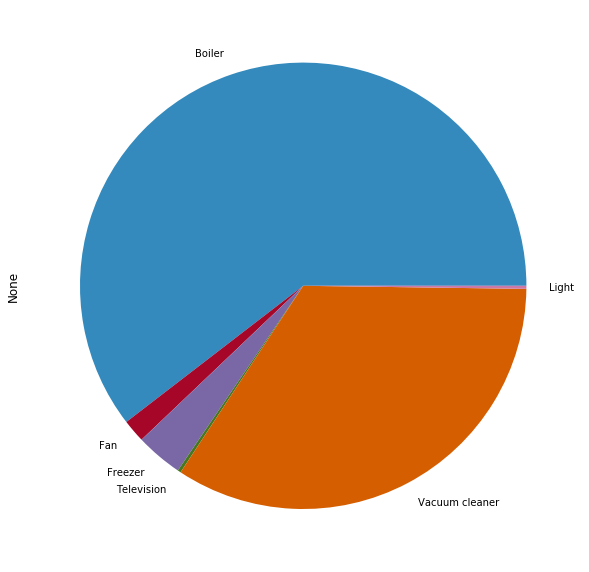

In [78]:
fraction = elec.submeters().fraction_per_meter().dropna()
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Vacuum Cleaner

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (Vacuum Cleaner).Primero veamos el timeframe.

In [79]:
vacuum_cleaner.get_timeframe()
#light.plot()

TimeFrame(start='2021-11-11 17:41:34+01:00', end='2021-11-11 17:46:41+01:00', empty=False)

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

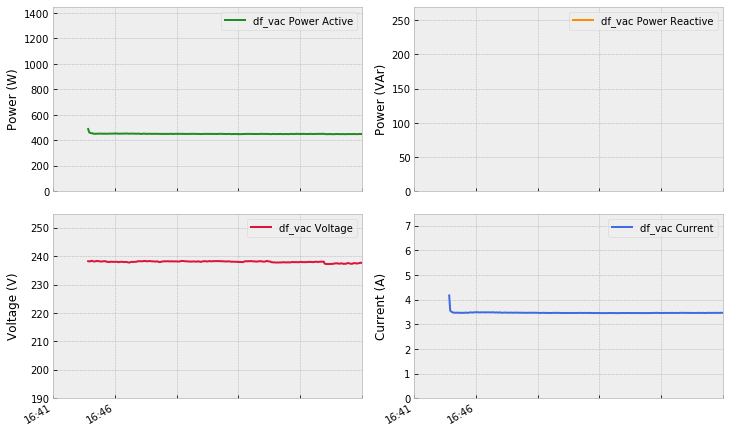

In [80]:
t0 = '2021-11-11 17:41:00+01:00' #tiempo inicial
t1 = '2021-11-11 17:46:00+01:00' #tiempo final

df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-11 17:41:00+01:00','2021-11-11 17:46:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:41','16:46'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/paso1/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Freezer

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

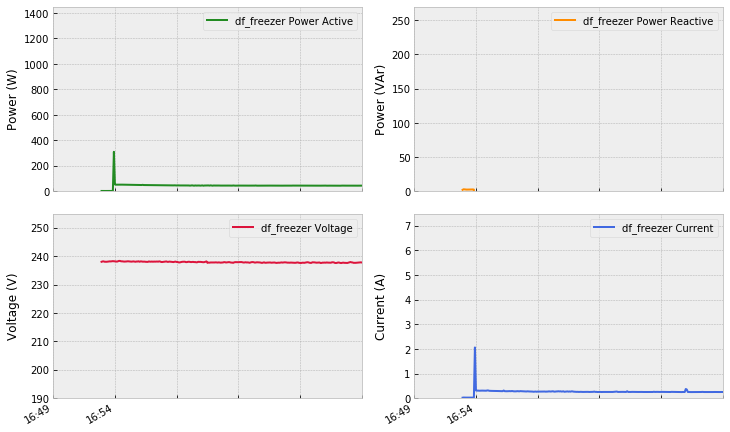

In [81]:
t0 = '2021-11-11 17:49:00+01:00' #tiempo inicial
t1 = '2021-11-11 17:54:00+01:00' #tiempo final

df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_freezer['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_freezer['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_freezer['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_freezer['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-11 17:49:00+01:00','2021-11-11 17:54:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:49','16:54'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/paso1/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

Una nevera esta compuesta basicamente por un compresor  y su electronica asociada,motivo por el cual vemos un pico de potencia reactiva coincidiendo con el arranque del motor con su correspondiente pico de consumo y el potencia.

### Boiler

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

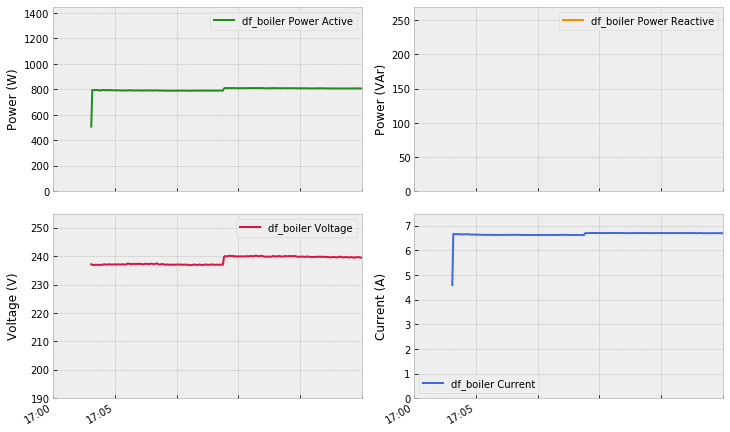

In [82]:

t0 = '2021-11-11 18:00:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:05:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_boiler['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_boiler['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_boiler['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_boiler['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-11 18:00:00+01:00','2021-11-11 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['17:00','17:05'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/paso1/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Light

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

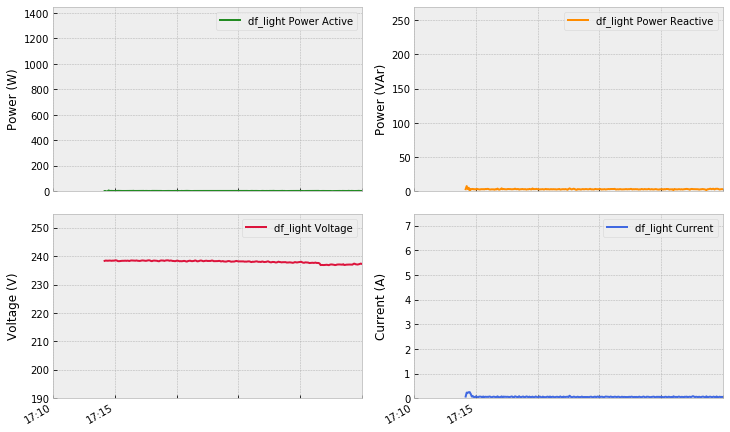

In [83]:
t0 = '2021-11-11 18:10:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:15:00+01:00' #tiempo final


df_light = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_light['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_light Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_light['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_light Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_light['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_light Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_light['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_light Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-11 18:10:00+01:00','2021-11-11 18:15:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['17:10','17:15'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/paso1/df_light.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Fan

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

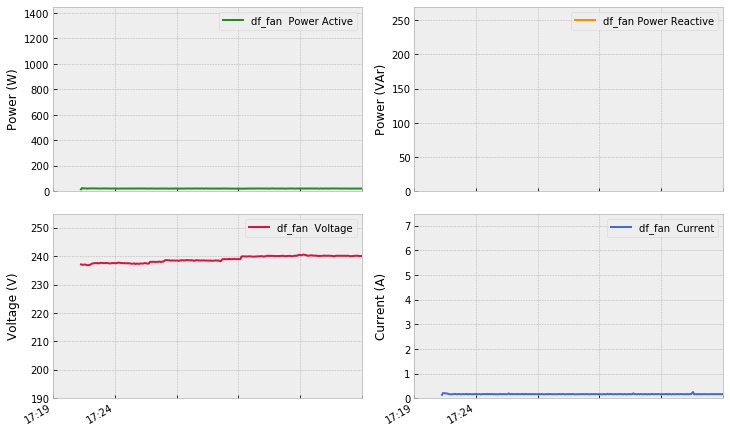

In [84]:
t0 = '2021-11-11 18:19:00+01:00' #tiempo inicial
t1 = '2021-11-11 18:24:00+01:00' #tiempo final


df_fan = next(elec[3].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-11 18:19:00+01:00','2021-11-11 18:24:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['17:19','17:24'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/paso1/df_fan.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

### TV

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

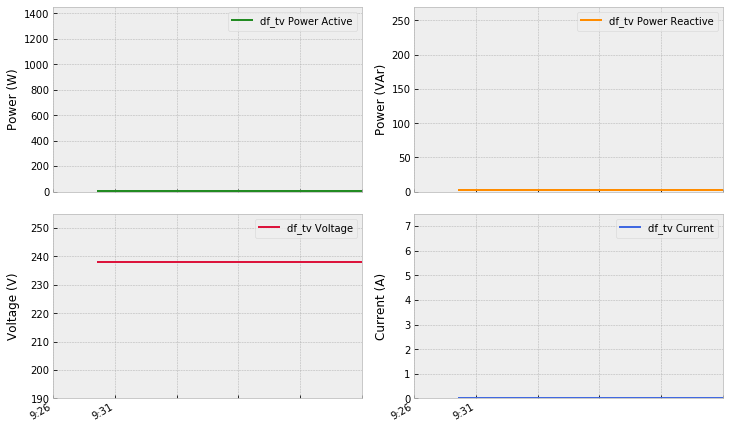

In [85]:
t0 = '2021-11-12 10:26:00+01:00' #tiempo inicial
t1 = '2021-11-12 10:31:00+01:00' #tiempo final


df_tv = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2021-11-12 10:26:00+01:00','2021-11-12 10:31:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['9:26','9:31'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

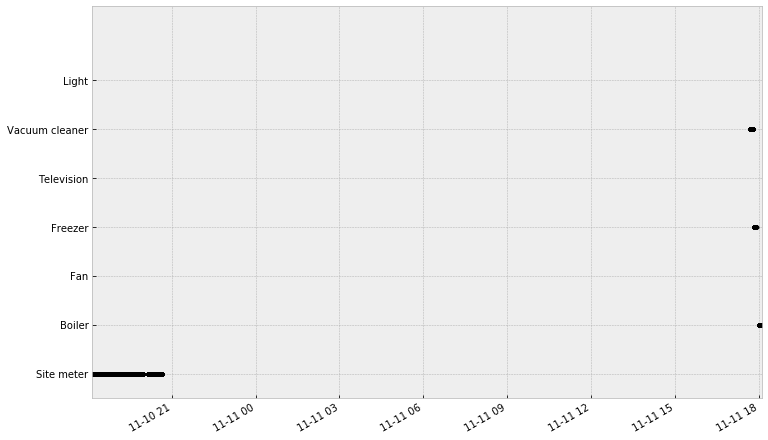

In [86]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

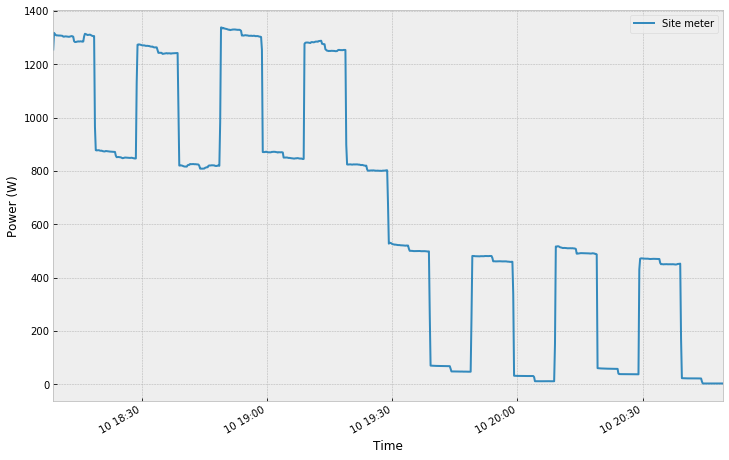

In [87]:
dsualm.set_window(start='2021-11-10', end='2021-11-11')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

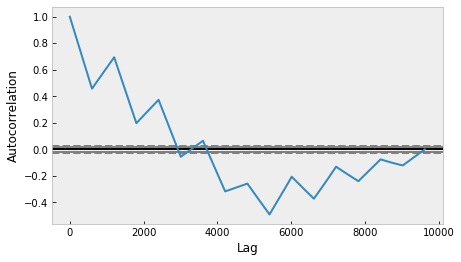

In [95]:
from pandas.plotting import autocorrelation_plot
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [90]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

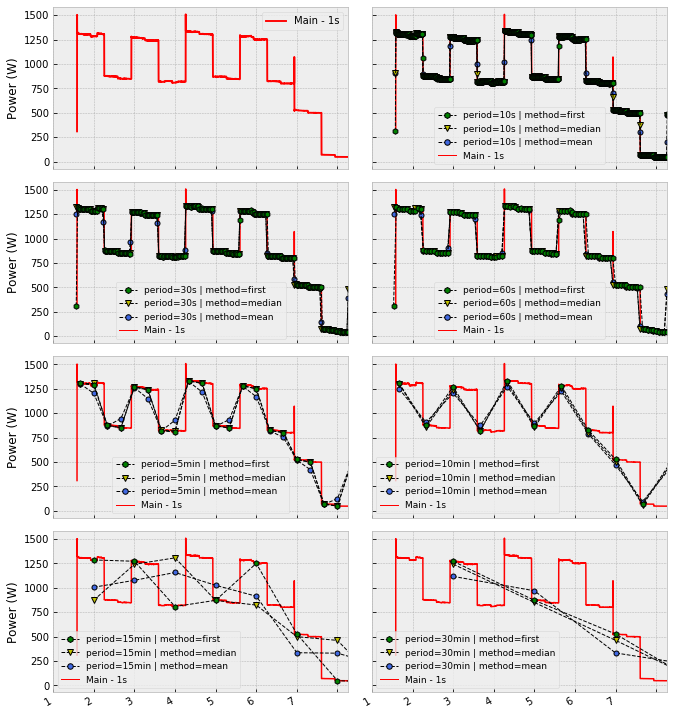

In [91]:
rcParams['figure.figsize'] = (11, 14)

#t0 = '2021-11-10 18:00:00+01:00'
#t1 = '2021-11-12 18:05:00+01:00'

t0 = '2021-11-10 18:08:00+01:00'
t1 = '2021-11-10 20:49:00+01:00'
labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-10 19:49:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/paso1/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [92]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

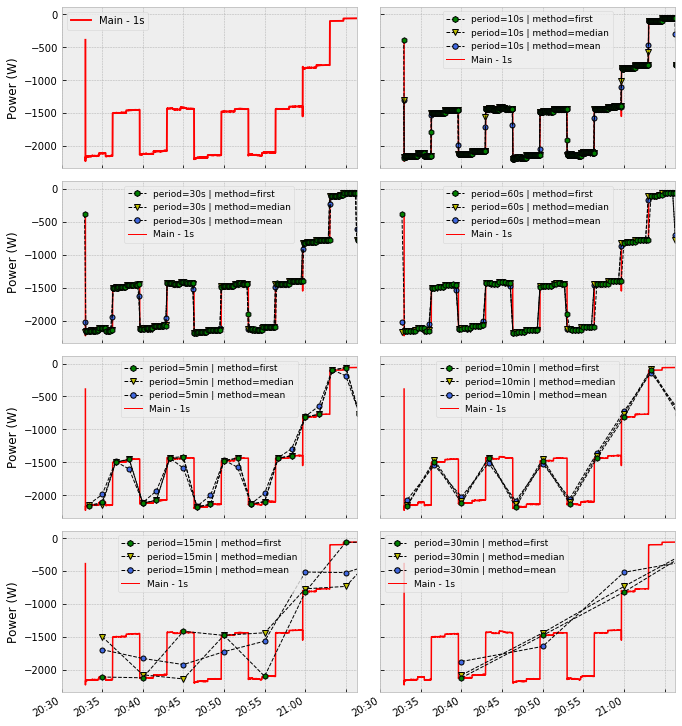

In [93]:
rcParams['figure.figsize'] = (11, 14)
#t0 = '2021-11-10 18:00:00+01:00'
#t1 = '2021-11-12 18:05:00+01:00'
t0 = '2021-11-10 18:08:00+01:00'
t1 = '2021-11-10 20:49:00+01:00'

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-10 19:49:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/paso1/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass

Marcadores: 
- https://matplotlib.org/3.1.0/api/markers_api.html

Colores:
- https://matplotlib.org/api/colors_api.html?highlight=colors#module-matplotlib.colors
- https://matplotlib.org/3.1.0/gallery/color/named_colors.html